# Lab 10: Sampling

* Inverse CDF sampling
* Accept-Reject sampling
* Importance sampling

## General

In statistics, quality assurance, and survey methodology, sampling is the selection of a subset or a statistical sample (termed sample for short) of individuals from within a statistical population to estimate characteristics of the whole population. Statisticians attempt to collect samples that are representative of the population. Sampling has lower costs and faster data collection compared to recording data from the entire population, and thus, it can provide insights in cases where it is infeasible to measure an entire population.

Each observation measures one or more properties (such as weight, location, colour or mass) of independent objects or individuals. In survey sampling, weights can be applied to the data to adjust for the sample design, particularly in stratified sampling. Results from probability theory and statistical theory are employed to guide the practice. In business and medical research, sampling is widely used for gathering information about a population. Acceptance sampling is used to determine if a production lot of material meets the governing specifications.

Sampling helps to ensure that the results obtained from analyzing the sample can be generalized to the whole population.

By carefully selecting a representative sample, we can reduce bias and increase the accuracy of our statistical inferences. We remember that statistical bias is a term used to describe statistics that don't provide an accurate representation of the population.

There are 6 types of statistical bias:

1.   **Selection Bias**

*   *Sampling bias* refers to the collection of a biased sample caused by non-random sampling. To give an example, imagine that there are 10 people in a room, and you ask if they prefer grapes or bananas. If you only surveyed the three women present and concluded that the majority of people like grapes, you'd have demonstrated sampling bias.
*   *Time interval bias* is caused by intentionally specifying a certain range of time to support the desired conclusion. For example, determining the average number of tweets per hour from a sample taken during peak hours (9 p.m. to 12 a.m.) is an example of time interval bias.
*   *Susceptibility bias* refers to the instance where one occurrence is susceptible to a second occurrence, but any effect on the first occurrence is also susceptible to the second occurrence. This can make the effect falsely attributed to causing the second occurrence. For example, a patient who has high cholesterol could suffer heart disease, so they may take a certain medication to lower their cholesterol levels. However, the medication may be blamed instead to be causing the patient's heart disease. This type of bias arises particularly in epidemiological studies, and includes clinical susceptibility bias, protopathic bias, and indication bias, which all relate to mixing up cause/effect with correlation.
*   *Confirmation bias* is the tendency to favor information that confirms one's beliefs. This can lead individuals to seek out and support only a small subset of larger data, and ignore remaining data that doesn't align with what they're searching for. For example, confirmation bias can surface during presidential elections. Individuals may intentionally look for information that depicts their preferred candidate as a positive figure, while at the same time ignoring information that depicts them as a negative figure.

2.   **Survivorship Bias**

Survivorship bias is a phenomenon where only those that survived a long process are included or excluded in an analysis, thus creating a biased sample. Sreenivasan Chandrasekar provides this example: "We enroll for gym membership and attend for a few days. We see the same faces of many people who are fit, motivated and exercising every day whenever we go to gym. After a few days, we become depressed. Why aren't we able to stick to our schedule and motivation more than a week when most of the people whom we saw at gym could? What we didn't see was that many of the people who had enrolled for gym membership had also stopped turning up for gym just after a week, and we didn't see them."

3.   **Omitted Variable Bias**

Omitted variable bias stems from the absence of relevant variables in a machine learning or forecasting model. In machine learning, removing relevant and/or too many variables results in an underfit model. An example of this is purchasing a car based on the brand and the car model, but not the mileage. Imagine finding a 2020 Porsche 911 Turbo for $10,000. That sounds like a steal until you find out that there are 400,000 miles on it.

4.   **Recall Bias**

Recall bias is a type of information bias where people do not remember previous events, memories or details, leading to inaccurate accounts of past exposures. It is related to recency bias, where we tend to remember things that have happened more recently better. This can accidentally influence results in cases of self-reporting studies. For example, say you are conducting a survey about who in your town contracted the flu and whether or not they previously received their flu vaccine. When asking people with the flu if they have gotten a vaccine, they may not be able to remember if they have.

5.   **Observer Bias**

This bias stems from the subjective viewpoint of observers and how they assess subjective criteria or record subjective information. Observer bias can be especially likely to occur if the conductor of a study has a desired outcome or preconception from the mentioned study. For example, suppose a scientist holds a study where two groups are told that they are given a medication to help with headaches, with one group actually receiving a placebo. The scientist already expects that the placebo group will still experience headaches. From this assumption, the scientist treats the two groups differently and may frame questions about pain level in a subjective manner for each group.

6.   **Funding Bias**

Also known as sponsorship bias, funding bias is the tendency to skew a study or the results of a study to support a financial sponsor. Funding bias has been seen in studies reporting the nutritional effects of commercial products like food, tobacco or pharmaceutical drugs. An example of funding bias could be a shampoo manufacturer who uses a harmful chemical as part of its ingredients may fund studies that support the positive effects of using the chemical.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(42)

In [44]:
def coin_flip(xmin = 0, xmax = 1, n = 1):
    return np.random.uniform(xmin, xmax, n)

## Inverse CDF sampling

**Inverse transform sampling** is a basic method for pseudo-random number sampling, i.e., for generating sample numbers at random from any probability distribution given its cumulative distribution function.

Inverse transformation sampling takes uniform samples of a number $u$ between 0 and 1, interpreted as a probability, and then returns the smallest number $x \in \mathbb{R}$ such that $F(x) \geqslant u$ for the cumulative distribution function $F$ of a random variable. For example, imagine that $F$ is the standard normal distribution with mean zero and standard deviation one. The table below shows samples taken from the uniform distribution and their representation on the standard normal distribution.

$u: \;\;\;\;\;\;\;\; 0.5 \;\;\; 0.975 \;\;\;\;\, 0.995 \;\; 0.999999 \\ F^{-1}(u): 0 \;\; 1.95996 \;\; 2.5758 \;\; 4.75342$

We are randomly choosing a proportion of the area under the curve and returning the number in the domain such that exactly this proportion of the area occurs to the left of that number. Intuitively, we are unlikely to choose a number in the far end of tails because there is very little area in them which would require choosing a number very close to zero or one.

Suppose you have $X \sim f(x)$. Also, you have access to its inverse CDF $F^{-1}$. To sample from $X$ you need to perform these two steps:

* Sample $U \sim Uniform(0, 1)$;
* Then $X = F^{-1}(U)$.

**Theorem:** Let $U$ be a continuous random variable having a standard uniform distribution. Then, the random variable $X = F_X^{-1}(U)$ has a probability distribution characterized by the invertible cumulative distribution function $F_X(x)$.

**Proof:** The cumulative distribution function of the transformation $X = F_X^{-1}(U)$ can be derived as $Pr(X \leqslant x) = Pr(F_X^{-1}(U) \leqslant x) = Pr(U \leqslant F_X(x)) = F_X(x),$ because the cumulative distribution function of the standard uniform distribution $Uniform(0, 1)$ is $U \sim Uniform(0, 1) \Rightarrow F_U(u) = Pr(U \leqslant u) = u$.

In [45]:
# suppose x is an Exp(1)

def f(x, l = 1):
    return l * np.e ** (-l * x)

def cdf(x, l = 1):
    return 1 - f(x, l)/l

def inverse_cdf(u, l = 1):
    return - np.log(l - u)

def inverse_cdf_sampling(inverse_cdf, n = 1000):
    us = coin_flip(n = n)
    return inverse_cdf(us)

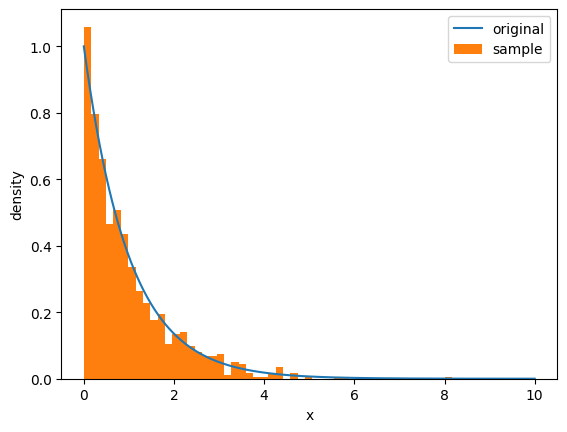

In [46]:
xs = np.linspace(0, 10, 1000)

samples = inverse_cdf_sampling(inverse_cdf)

plt.plot(xs, f(xs), label = 'original')
plt.hist(samples, density = True, bins = 50, label = 'sample')

plt.legend()
plt.xlabel('x')
plt.ylabel('density')
plt.show()

## Accept-Reject sampling

In numerical analysis and computational statistics, **rejection sampling** is a basic technique used to generate observations from a distribution. It is also commonly called the acceptance-rejection method or "accept-reject algorithm" and is a type of exact simulation method. Rejection sampling is based on the observation that to sample a random variable in one dimension, one can perform a uniformly random sampling of the two-dimensional Cartesian graph, and keep the samples in the region under the graph of its density function.

Suppose you have $X \sim f(x)$. However, you don't have access to its inverse CDF $F^{-1}$, because it's hard to calculate. In this situation you can sample from the distribution using accept-reject sampling. For that you will need to:

* Sample a proposal $X^* \sim g(x)$ and $U \sim Uniform(0, 1)$;
* Accept $X = X^*$ if $U \leqslant \frac{1}{M} \frac{f(X^*)}{g(X^*)}$, otherwise you will need to return to the previous step.

$1 < M < +\infty$ is a constant, such that $\forall x: M g(x) \geqslant f(x)$.

But how to find an optimal value of $M$? Let's put $M = sup_x \frac{f(x)}{g(x)}$.

* Probability of accepting a value is $\frac{1}{M}$;
* $f(x)$ is only needed to be known up to a normalizing constant.


In [47]:
def f(x):
    return np.exp(-(x**2)/2)/(np.sqrt(2*3.14))

def g(x):
    return np.ones_like(x)/10

def sample_one(f, g, M):
    candidate = coin_flip(xmin = -3, xmax = 3)[0]
    u = coin_flip()[0]
    ratio = 1/M * (f(candidate)/g(candidate))
    return candidate if u <= ratio else None

def accept_reject(f, g, M, n = 1000):
    sample = []
    loop = tqdm(position = 0, leave = True)
    i = 0
    while len(sample) < n:
        i += 1
        candidate = sample_one(f, g, M)
        if candidate is not None:
            sample.append(candidate)
        loop.update()
        loop.set_description(
            f'Accept ratio: {len(sample)/i:.5f}'
        )

        if i == n*10:
            break

    return sample

Accept ratio: 0.42571: : 2349it [00:00, 2419.84it/s]


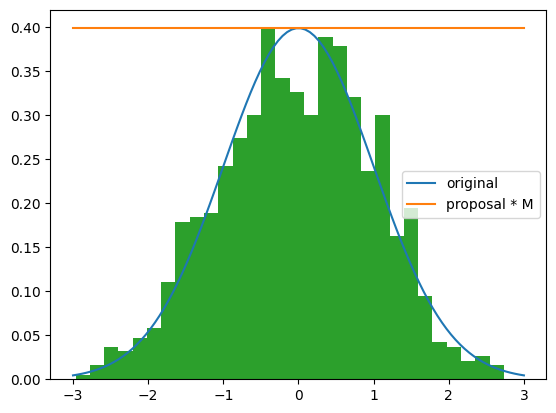

In [48]:
xs = np.linspace(-3, 3, 100)
M = max(f(xs)/g(xs))

plt.plot(xs, f(xs), label = 'original')
plt.plot(xs, g(xs) * M, label = 'proposal * M')

sample = accept_reject(f, g, M, n = 1000)
plt.hist(sample, bins = 30, density = True)

plt.legend()
plt.show()

## Self-practice task: Importance sampling

**Importance sampling** is a Monte Carlo method for evaluating properties of a particular distribution, while only having samples generated from a different distribution than the distribution of interest.

Let's assume that we want to calculate the expected value of a function $f(x)$, where $x \sim p(x)$:

$$E[f(x)] = ∫ f(x)p(x)dx ≃ \frac{1}{n} ∑\limits_{i} f(x_i)$$

Monte Carlo sampling is to sample $x_i$ from distribution $p(x)$ and take the average of all samples to get an estimation. However, what we can do if we cannot sample from $p(x)$? Can we estimate the expectation based on some known and easily sampled distribution?

YES, WE CAN!

$$E[f(x)] = ∫ f(x)p(x)dx = ∫ f(x) \frac{p(x)}{q(x)}q(x)dx ≃ \frac{1}{n} ∑\limits_{i} f(x_i) \frac{p(x_i)}{q(x_i)}$$

Now, $x$ can be sampled from distribution $q(x)$, $q(x)$ is not equal to $0$.

$\frac{p(x)}{q(x)}$ is called **sampling ratio** or **sampling weight**.

In [49]:
import scipy.stats as stats

def distribution(mu = 0, sigma = 1):
    distribution = stats.norm(mu, sigma)
    return distribution

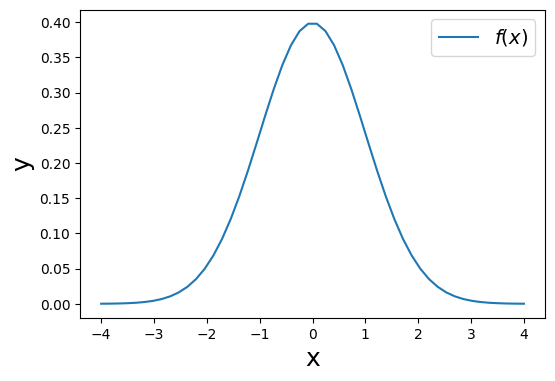

In [50]:
plt.figure(figsize = [6, 4])
x = np.linspace(-4, 4, 50)  # x ranges from 0 to 4
y = [f(i) for i in x]

plt.plot(x, y, label = "$f(x)$")

plt.xlabel("x", size = 18)
plt.ylabel("y", size = 18)
plt.legend(prop = {"size": 14})
plt.show()

<font color='red'>TODO:</font> Define target ($p$) and proposal ($q$) distributions in a code cell below. $p(x)$ is normal with $\mu=3.5$ and $\sigma=1$ and $q(x)$ is normal with $\mu = 1$ and $\sigma=1$.

In [51]:
def density_funciton_p(x: np.ndarray):
    return stats.norm.pdf(x, 
                          loc=3.5, # loc represents the mean
                          scale=1, # scale represents the std (std == 1 => var == 1) 
                          )
def density_function_q(x: np.ndarray):
    return stats.norm.pdf(x, 
                          loc=1, # loc represents the mean 
                          scale=1 # std represents the variance
                          )

<font color='red'>TODO:</font> Sample from $p$ and $q$ and plot histograms to show the difference between those two.

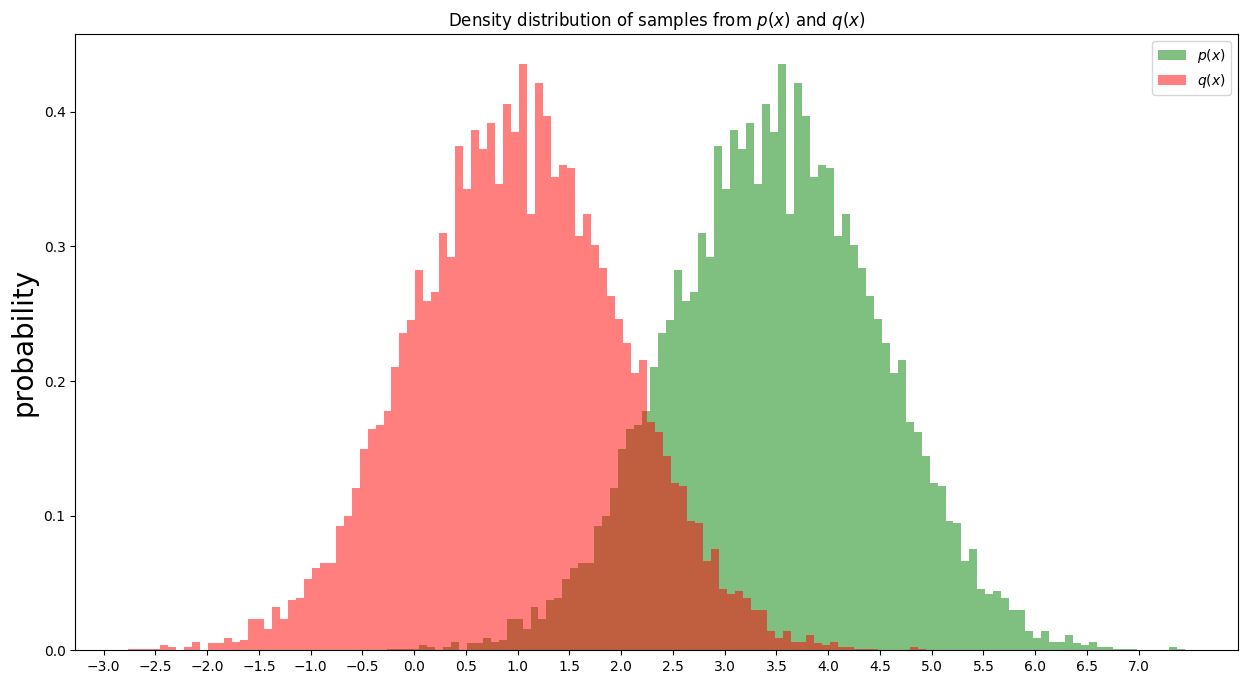

In [52]:
def sample_from_p(num_samples: int ):
    return stats.norm.rvs(loc=3.5, 
                          scale=1,
                          size=num_samples, 
                          random_state=18)

def sample_from_q(num_samples: int ):
    return stats.norm.rvs(loc=1, 
                          scale=1,
                          size=num_samples, 
                          random_state=18)

plt.figure(figsize=(15, 8))

samples_p = sample_from_p(10000)
plt.hist(samples_p, 
         bins=100, 
         density=True, 
         alpha=0.5, 
         color='green', 
         label="$p(x)$")

samples_q = sample_from_q(10000)
plt.hist(samples_q, 
         bins=100, 
         density=True, 
         alpha=0.5, 
         color='red', 
         label="$q(x)$")

plt.title("Density distribution of samples from $p(x)$ and $q(x)$")
plt.legend()
plt.ylabel("probability", size=20)
plt.xticks(ticks=np.linspace(-3, 7,21))
plt.show()

<font color='red'>TODO:</font> estimate $E(f(x))$ using importance sampling. Output the mean and variance of the estimate. Use a sample of size 50000 points.

In [53]:
sample_size = 50000

samples_q = sample_from_q(sample_size)

weights = density_funciton_p(samples_q) / density_function_q(samples_q)

weighted_density = f(samples_q) * weights

est_mean, est_var =  np.mean(weighted_density), np.var(weighted_density) 

print("average: ", est_mean)
print("variance: ", est_var)

average:  0.013202077653507708
variance:  0.00011861498916573497
